In [1]:
# Basic import
import os
import sys
import json
import shutil
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [36]:
# Helper function
def writeProgress(msg, count, total):
    sys.stdout.write(msg + "{:.2%}\r".format(count/total))
    sys.stdout.flush()
    
def newPath(path):
    if not os.path.isdir(path):
        os.mkdir(path)

def read_json(src_path):
    with open(src_path, 'r') as json_file:
        data = json.load(json_file)
    return data

def write_json(data,dst_path):
    with open(dst_path, 'w') as outfile:
        json.dump(data, outfile)

def writeLog(row):
    with open('log.txt', 'a') as outfile:
        outfile.write(row + '\n')
        
def getErrMsg(e):
    error_class = e.__class__.__name__ #取得錯誤類型
    detail = e.args[0] #取得詳細內容
    errMsg = "[{}] {}".format(error_class, detail)
    return errMsg

In [3]:
# 讀取固定的類別順序
genres = read_json('../orderdListGenres.json')
print(len(genres), genres)

20 ['Action', 'Adventure', 'Animation', 'Biography', 'Comedy', 'Crime', 'Documentary', 'Drama', 'Family', 'Fantasy', 'History', 'Horror', 'Music', 'Mystery', 'Romance', 'Sci-Fi', 'Sport', 'Thriller', 'War', 'Western']


In [4]:
# 讀取電影所屬的分類
genresMat = read_json('../genresMat.json')
len(genresMat)

97

# Makedir SplitTrailers_crop/

In [33]:
PATH = './2018Trailers/'
TRAILER = './2018SplitTrailers_crop/'
newPath(TRAILER)

In [6]:
from __future__ import print_function
import scenedetect
from scenedetect.video_manager import VideoManager
from scenedetect.scene_manager import SceneManager
from scenedetect.frame_timecode import FrameTimecode
from scenedetect.stats_manager import StatsManager
from scenedetect.detectors import ContentDetector
import cv2     # for capturing videos

In [37]:
def splitScene(dic, horizontal = True):
    count = 0
    for key, v in dic.items():
        count += 1
        
        video = PATH + key + '.mp4'
        border = v
        print(count, key, border)

        savePath = TRAILER + key
        newPath(savePath)

        cap = cv2.VideoCapture(video)
        w = int(cap.get(3))
        h = int(cap.get(4))
        fps = cap.get(5)
        duration = cap.get(7)
        print(w, 'x', h, 'FPS:', fps, duration)
        fourcc = cv2.VideoWriter_fourcc(*'XVID')
        if horizontal:
            newH = h - 2*border # horizontal
        else:
            newW = w - 2*border # vertical
            
        # scenedetect
        video_manager = VideoManager([video])
        stats_manager = StatsManager()
        scene_manager = SceneManager(stats_manager)
        # Add ContentDetector algorithm (constructor takes detector options like threshold).
        scene_manager.add_detector(ContentDetector())
        base_timecode = video_manager.get_base_timecode()

        try:
            video_manager.set_duration()

            # Set downscale factor to improve processing speed (no args means default).
            video_manager.set_downscale_factor()

            # Start video_manager.
            video_manager.start()

            # Perform scene detection on video_manager.
            scene_manager.detect_scenes(frame_source=video_manager)

            # Obtain list of detected scenes.
            scene_list = scene_manager.get_scene_list(base_timecode)
            # Like FrameTimecodes, each scene in the scene_list can be sorted if the
            # list of scenes becomes unsorted.

    #         print('List of scenes obtained:')
            length = len(scene_list)
            print('Scene count:', length)
            for i, scene in enumerate(scene_list):

                scenePath = savePath + '/' + 'scene_' + str(i+1) +'/'
                newPath(scenePath)

                framePath = scenePath + 'frames/'
                newPath(framePath)
                filename = scenePath + 'clip.avi'
    #             print(filename)

                out = cv2.VideoWriter(filename, fourcc, fps, (w if horizontal else newW, 
                                                              newH if horizontal else h))

                start = scene[0].get_frames()
                end = scene[1].get_frames()

                cap.set(1,start)

                while(cap.isOpened()):

                    ret, frame = cap.read()
                    if horizontal:
                        frame = frame[border: h - border, :] # horizontal
                    else:
                        frame = frame[:, border: w - border] # vertical

                    current = int(cap.get(1))

                    if (ret == True):
                        out.write(frame)
                        cv2.imwrite(framePath + str(current) + '.jpg', frame)

                        if current == end:
                            break
                    else:
                        break

                    writeProgress('Progerss:',current, duration)
        except Exception as e:
            errMsg = getErrMsg(e)
            print(errMsg)
            writeLog(key + '\n\t' + errMsg)
            
        finally:
            video_manager.release()
            cap.release()
            out.release()

## Get horizontal and vertical dict respectively

In [8]:
dic = read_json('./json/crop_dict4Trailers_2018.json')
print(type(dic))
dic = eval(dic)
print(type(dic))
print(len(dic))
# del dic_h['highlifemovie']
# print(len(dic_h))

# dic_v = read_json('./json/crop_dict4Trailers_vertical.json')
# print(dic_v)

<class 'str'>
<class 'dict'>
1405


In [16]:
done = os.listdir('./2018SplitTrailers_crop/')
done.remove('tt6843652')
print(len(dic), len(done))
dic

1405 986


{'tt8718192': 14,
 'tt7640194': 0,
 'tt8478602': 0,
 'tt8580242': 0,
 'tt8887766': 92,
 'tt8320292': 0,
 'tt5433276': 0,
 'tt9776082': 0,
 'tt9464032': 13,
 'tt1571234': 92,
 'tt9616622': 0,
 'tt6966692': 40,
 'tt3369286': 0,
 'tt9818154': 0,
 'tt8974572': 0,
 'tt7334528': 14,
 'tt9013842': 0,
 'tt7473390': 0,
 'tt4418730': 26,
 'tt7533486': 93,
 'tt6334884': 92,
 'tt8149240': 14,
 'tt4860490': 88,
 'tt9252028': 0,
 'tt6142146': 0,
 'tt9378944': 93,
 'tt6200656': 87,
 'tt8129892': 0,
 'tt7419412': 93,
 'tt9183176': 0,
 'tt4865022': 40,
 'tt8377564': 93,
 'tt6250554': 86,
 'tt8929946': 86,
 'tt4883336': 76,
 'tt9178978': 0,
 'tt9125468': 0,
 'tt8997090': 0,
 'tt7999950': 0,
 'tt9085540': 46,
 'tt7806572': 0,
 'tt5433398': 0,
 'tt2777020': 0,
 'tt9646364': 0,
 'tt5822154': 92,
 'tt8956976': 0,
 'tt6229218': 0,
 'tt5884348': 92,
 'tt8880064': 93,
 'tt9094782': 92,
 'tt8901940': 0,
 'tt7699348': 90,
 'tt7836694': 87,
 'tt9828698': 0,
 'tt10005184': 0,
 'tt8947034': 0,
 'tt8016572': 86,
 't

In [17]:
for k in done:
    del dic[k]

In [18]:
print(len(dic), len(done))

419 986


### For horizontal crop

In [38]:
splitScene(dic)

1 tt6843652 87
1280 x 720 FPS: 24.88095238095238 418.0
Scene count: 8
[TypeError] 'NoneType' object is not subscriptable
2 tt9113252 69
1280 x 720 FPS: 25.0 4595.0


KeyboardInterrupt: 

In [35]:
len(os.listdir(TRAILER))

1405

### For vertical crop

In [ ]:
splitScene(dic_v, horizontal = False)

# Check crop results

In [ ]:
lis = os.listdir(originPath)
lis.index('highlifemovie')

In [39]:
import random

In [40]:
originPath = './2018SplitTrailers/'
cropPath = './2018CropSplitTrailers/'

Running: 1405 tt8718192
1900.jpg


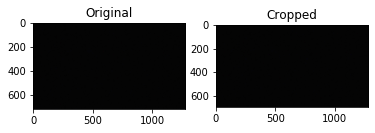

 x


1599.jpg


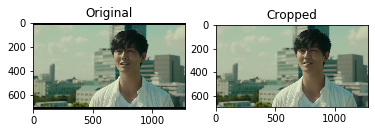

Running: 1404 tt7640194
706.jpg


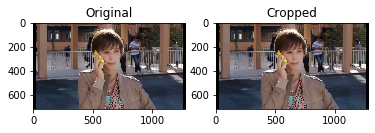

2530.jpg


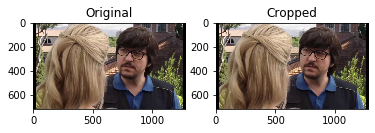

208.jpg


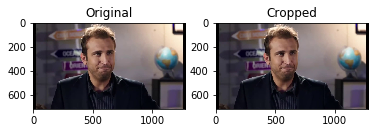

Running: 1403 tt8478602
329.jpg


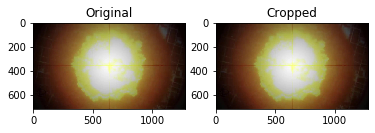

329.jpg


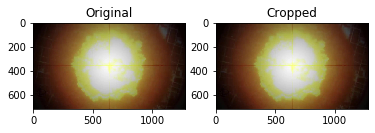

Running: 1402 tt8580242
3691.jpg


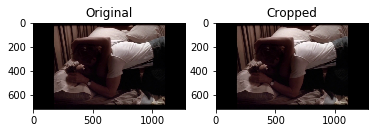

2468.jpg


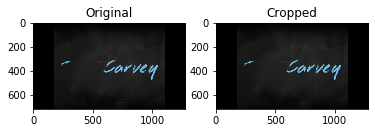

1306.jpg


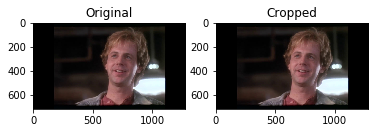

303.jpg


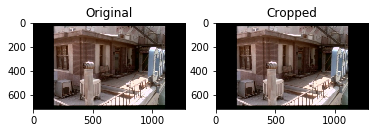

Running: 1401 tt8887766
2136.jpg


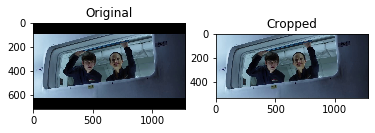

Running: 1400 tt8320292
2382.jpg


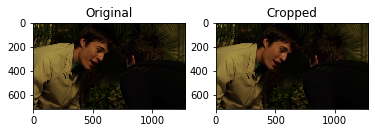

Running: 1399 tt5433276
2719.jpg


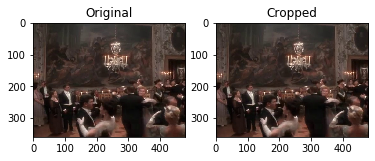

Running: 1398 tt9776082
3281.jpg


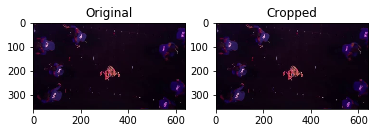

Running: 1397 tt9464032
174.jpg


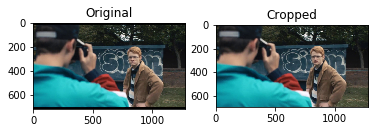

Running: 1396 tt1571234
163.jpg


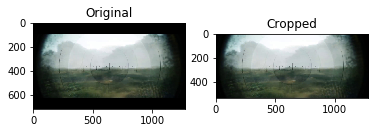

Running: 1395 tt9616622
1193.jpg


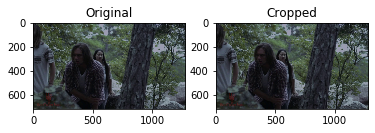

Running: 1394 tt6966692
872.jpg


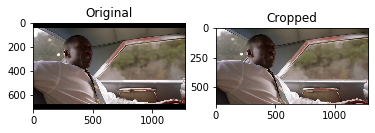

Running: 1393 tt3369286
2825.jpg


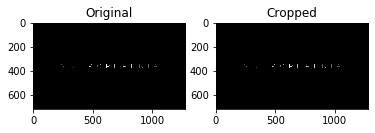

35.jpg


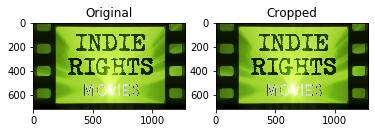

1321.jpg


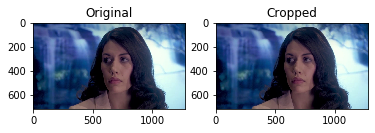

Running: 1392 tt9818154
179.jpg


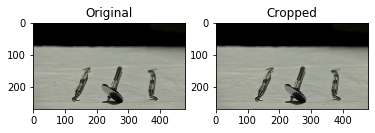

Running: 1391 tt8974572
448.jpg


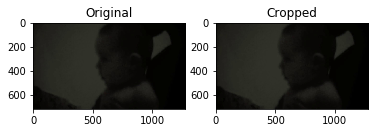

Running: 1390 tt7334528
2704.jpg


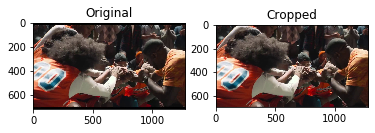

Running: 1389 tt9013842
3047.jpg


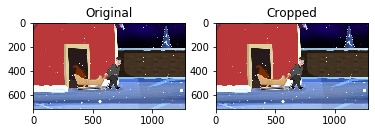

Running: 1388 tt7473390
1601.jpg


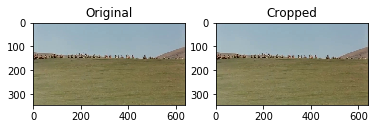

Running: 1387 tt4418730
1470.jpg


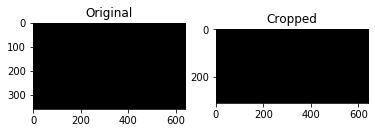

1394.jpg


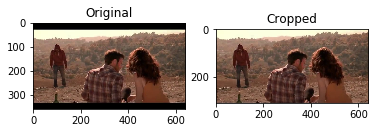

Running: 1386 tt7533486
1735.jpg


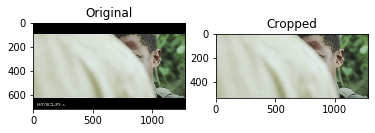

Running: 1385 tt6334884
3415.jpg


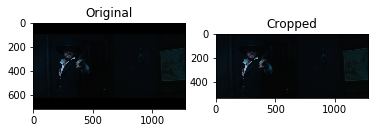

KeyboardInterrupt: 

In [41]:
countdown = len(os.listdir(originPath))
for movie in os.listdir(originPath):
    print('Running:', countdown, movie)
    sceneList = os.listdir(originPath + movie)
    nxt = True
    while nxt:
        scene = random.choice(sceneList)
        framePath = originPath + movie + '/' + scene + '/frames/'
        frameList = [int(name.split('.')[0]) for name in os.listdir(framePath)]
        frameList.sort()
    #     print(frameList)
        keyframe = str(frameList[len(frameList)//2]) + '.jpg'
        print(keyframe)

        ori_img = cv2.imread(originPath + movie + '/' + scene + '/frames/' + keyframe)[:,:,::-1]
        crop_img = cv2.imread(cropPath + movie + '/' + scene + '/frames/' + keyframe)[:,:,::-1]

        plt.subplot(121).set_title("Original"), plt.imshow(ori_img)
        plt.subplot(122).set_title("Cropped"), plt.imshow(crop_img)
        plt.show()
        
        usr_input = input()
        # "Enter" to next movie, otherwise random pick another image for check
        if usr_input == '': # move forwards
            nxt = False
            countdown -=1